In [2]:
import os
import os.path
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as pyplot


In [3]:
total=pd.read_csv("data/total.csv")

<__array_function__ internals>:200: UserWarning: Warning: converting a masked element to nan.
/Users/anniepfeufer/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/Users/anniepfeufer/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


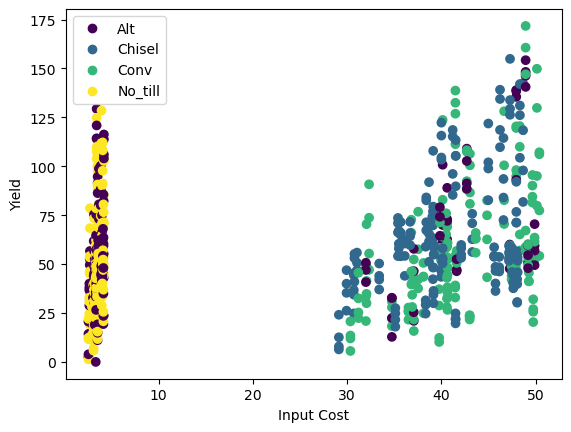

In [4]:
fig, ax=pyplot.subplots()
scatter = ax.scatter(total['input_cost'], total['Yield_bu_ac'], c=total['Tillage_st_x'].astype('category').cat.codes)
handles, labels = scatter.legend_elements()
ax.set_ylabel('Yield')
ax.set_xlabel('Input Cost')
unique_labels = total['Tillage_st_x'].astype('category').cat.categories
ax.legend(handles, unique_labels)

pyplot.show()



Text(0, 0.5, 'Profit')

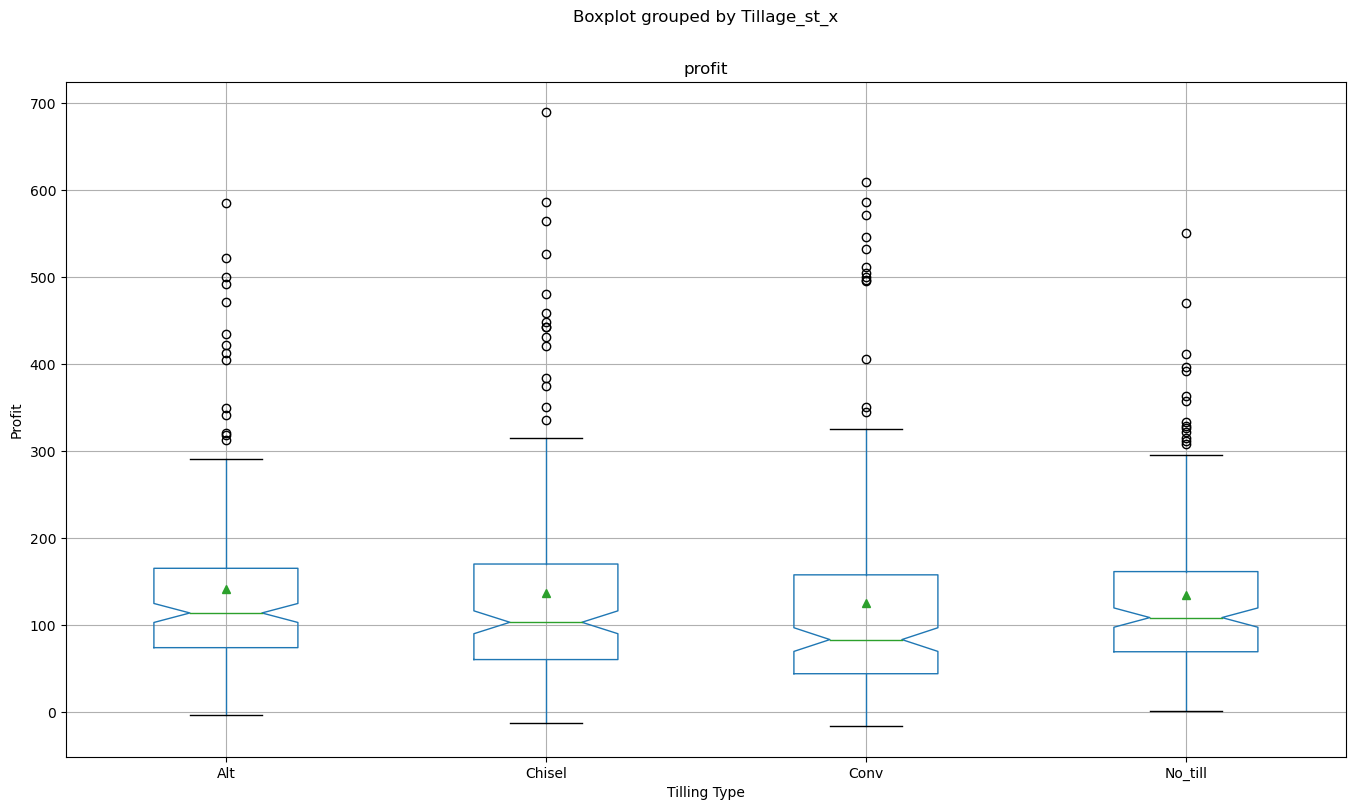

In [5]:
boxplot = total.boxplot(["profit"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Profit")

Text(0, 0.5, 'ROI')

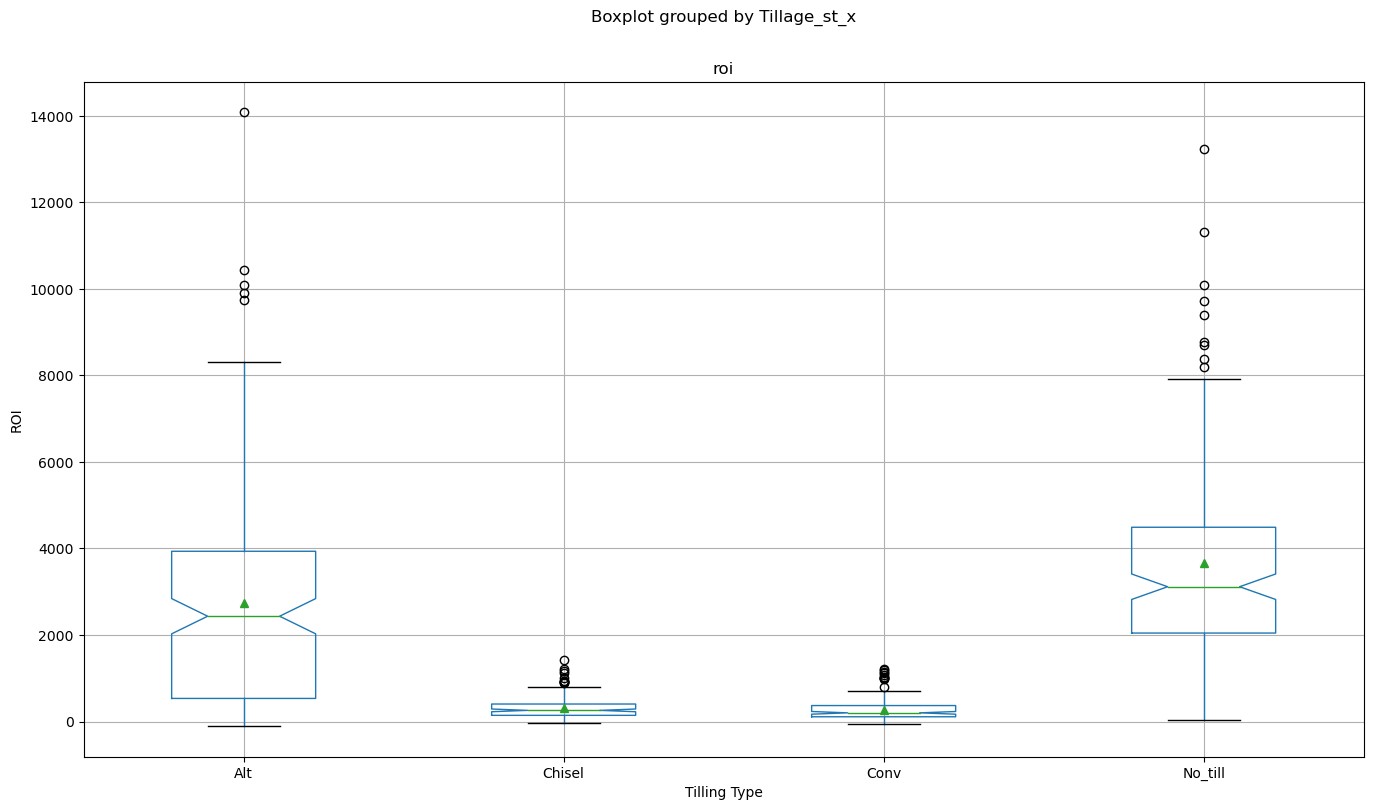

In [6]:
boxplot = total.boxplot(["roi"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("ROI")

In [7]:
import numpy as np

In [8]:

model=smf.ols(formula="profit ~ C(Tillage_st_x)", data=total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6402
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.589
Time:                        15:47:03   Log-Likelihood:                -4230.4
No. Observations:                 686   AIC:                             8469.
Df Residuals:                     682   BIC:                             8487.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [9]:
grouped=total.groupby(["Tillage_st_x", "Year"]).agg({"Yield_bu_ac":"mean", "input_cost":"mean", "profit":"mean", "roi":"mean"})

In [10]:
grouped

Yield_bu_ac  input_cost      profit           roi
Tillage_st_x Year                                                   
Alt          1970    34.800000    2.722098   43.561902   1600.306443
             1971    37.025000    2.702201   37.284799   1379.793909
             1972    47.000000   32.002656   41.787344    130.574616
             1973    10.325000    2.564469   23.764281    926.674664
             1974    35.900000    2.656079  105.761921   3981.881203
...                        ...         ...         ...           ...
No_till      2010    61.908210    4.180372  316.504158   7571.196743
             2011    46.747500    4.120550  286.648900   6956.568121
             2012    61.458863    4.159390  419.292173  10080.618007
             2013    26.580498    4.151924  114.397100   2755.279508
             2014   102.358005    4.072859  374.651759   9198.741106

[180 rows x 4 columns]

Text(0, 0.5, 'Yield')

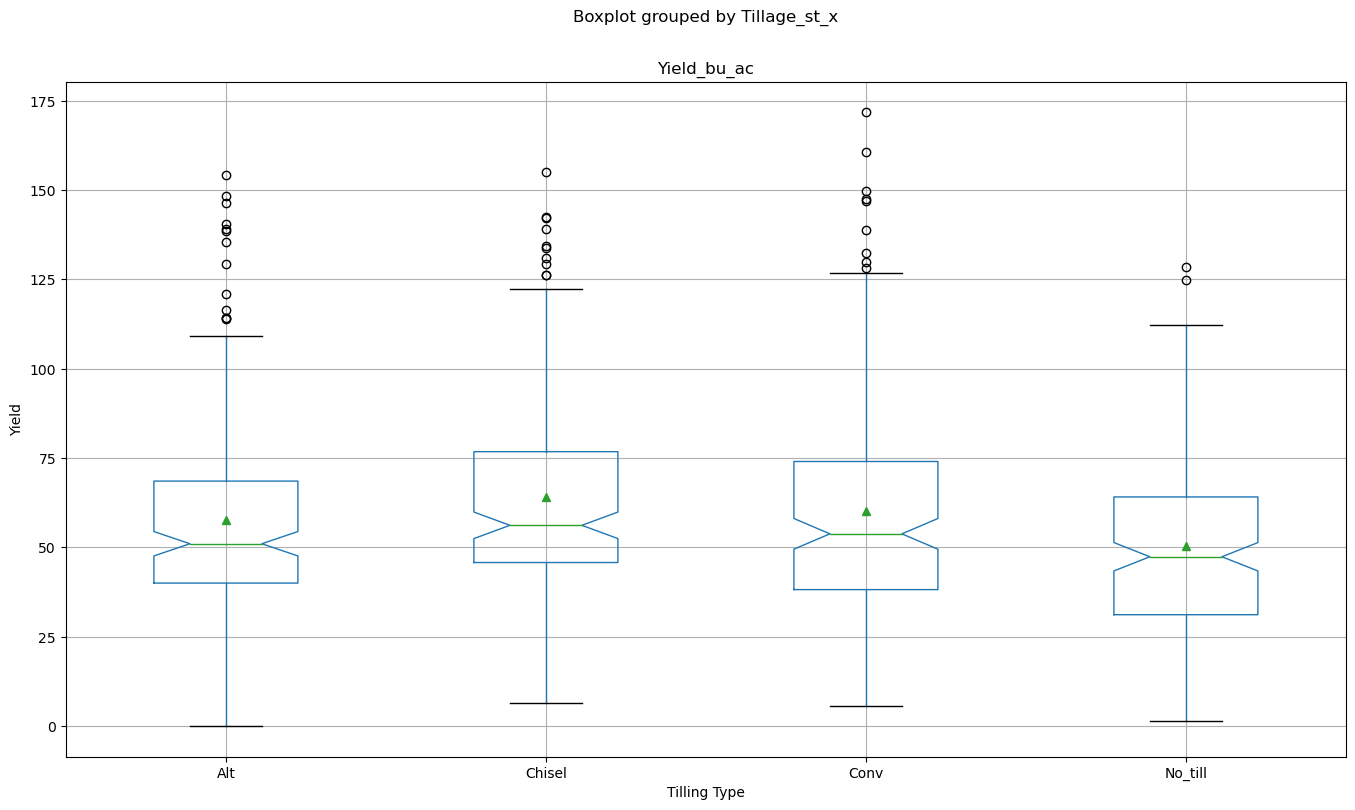

In [11]:
boxplot = total.boxplot(["Yield_bu_ac"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Yield")



Text(0, 0.5, 'Input Cost Required')

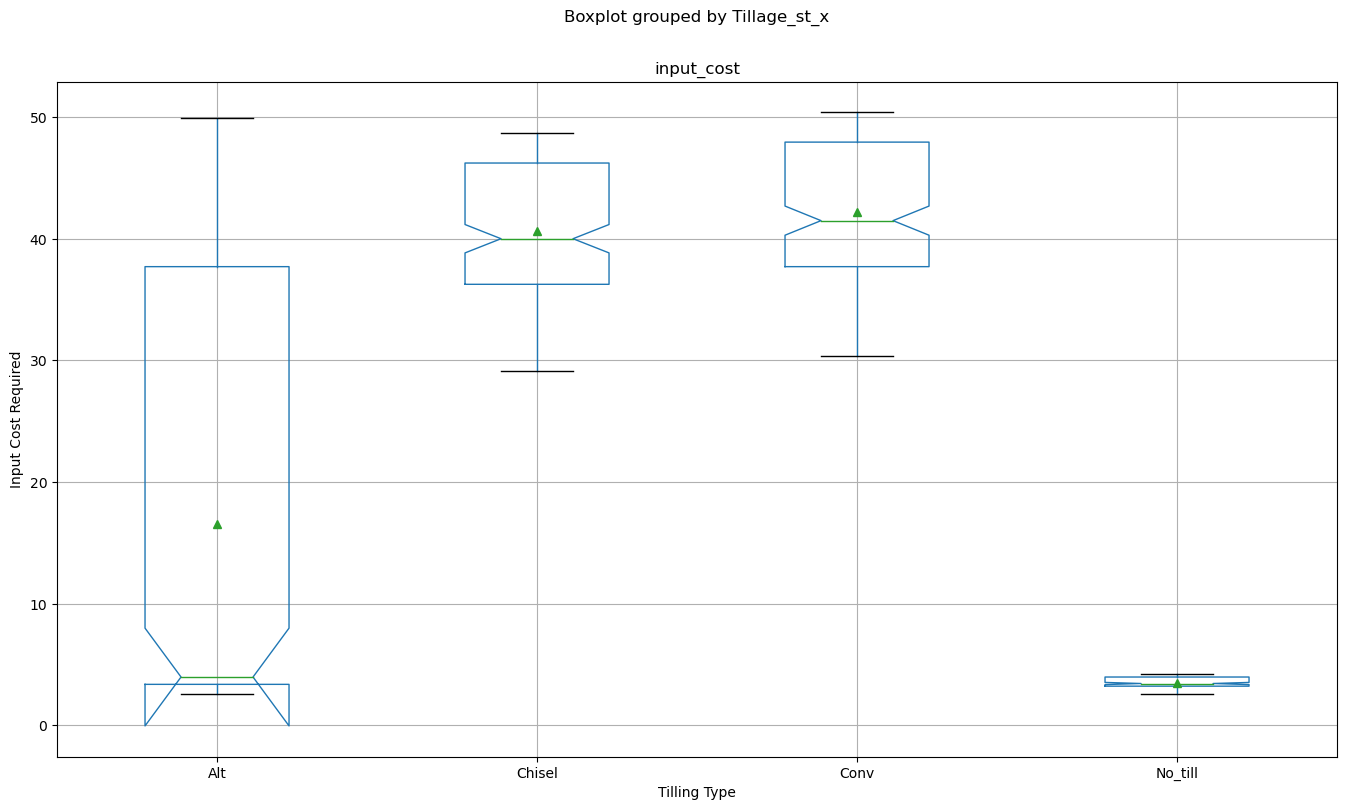

In [12]:
boxplot = total.boxplot(["input_cost"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True )

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Input Cost Required")


In [13]:
model = smf.ols("Yield_bu_ac ~ C(Tillage_st_x)", total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Yield_bu_ac   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.252
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           0.000344
Time:                        15:47:44   Log-Likelihood:                -3310.9
No. Observations:                 686   AIC:                             6630.
Df Residuals:                     682   BIC:                             6648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [14]:
model = smf.ols("input_cost ~ C(Tillage_st_x)", total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             input_cost   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     614.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.87e-197
Time:                        15:47:50   Log-Likelihood:                -2694.1
No. Observations:                 720   AIC:                             5396.
Df Residuals:                     716   BIC:                             5415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [15]:
import scipy.stats as stats

no_till = total[total['Tillage_st_x'] == "No_till"].copy()
no_till.dropna(inplace=True)
alt = total[total['Tillage_st_x'] == "Alt"].copy()
alt.dropna(inplace=True)
chisel = total[total['Tillage_st_x'] == "Chisel"].copy()
chisel.dropna(inplace=True)
conv = total[total['Tillage_st_x'] == "Conv"].copy()
conv.dropna(inplace=True)

In [37]:
t_stat, p_value = stats.ttest_ind(no_till["profit"], conv["profit"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.7685812371152062
P-value: 0.4426754674791201


In [38]:
t_stat, p_value = stats.ttest_ind(no_till["Yield_bu_ac"], conv["Yield_bu_ac"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.964726848864808
P-value: 0.003243466104802426


In [39]:
t_stat, p_value = stats.ttest_ind(no_till["input_cost"], conv["input_cost"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -85.2176991889578
P-value: 1.7333650271003115e-231


In [40]:

f_statistic, p_value = stats.f_oneway(no_till["profit"], conv["profit"],chisel["profit"], alt["profit"])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.6402117646043435
P-value: 0.589315391872417
